# Regression Application — STARTER NOTEBOOK

**Applied Machine Learning 2 @ Newman University**

*Prof. Ricky Boyer*

**Linh Toan**

**Important note!** Before you turn in this lab notebook, make sure everything runs as expected:

- First, **restart the kernel** -- in the menubar, select Kernel$\rightarrow$Restart.
- Then **run all cells** -- in the menubar, select Cell$\rightarrow$Run All.

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`

# Part 0: Sample dataset (Wine)

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].  Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

In case you need to bring the data in yourself, this would be the location to find the raw data and description, though the following locked cells should bring it in for you.

* Raw data and file description: http://https://archive.ics.uci.edu/dataset/186/wine+quality

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

file = 'https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/winequality-combined.csv'
wine_quality = pd.read_csv(file)

print("\n(All data appears to be ready.)")


(All data appears to be ready.)


Let's take a look at the data, first as a table, taking interest in a few columns.  Then we can look at them using a scatter plot.

In [2]:
df = wine_quality
print(df.dtypes)
display(df.head(15))

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
5,7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red
6,7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5,Red
7,7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7,Red
8,7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7,Red
9,7.5,0.500,0.36,6.1,0.071,17,102,0.9978,3.35,0.80,10.5,5,Red


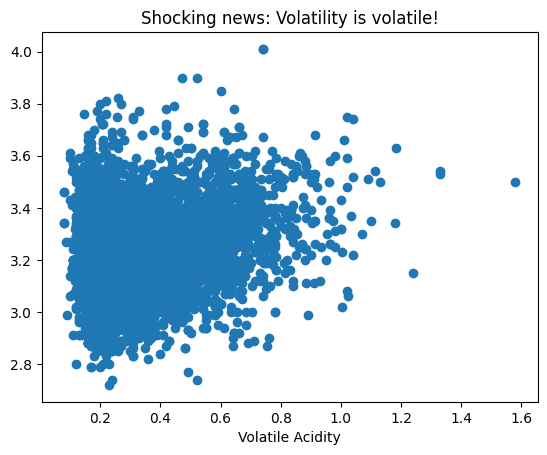

In [3]:
from matplotlib.pyplot import scatter, xlabel, title, plot
%matplotlib inline

scatter(df['volatile acidity'], df['pH'])
xlabel ('Volatile Acidity')
title ('Shocking news: Volatility is volatile!');

## Fitting a model

**Exercise 0** (40 points). Complete the function below so that it computes $\alpha$ and $\beta$ for the univariate model, $y \sim \alpha \cdot x + \beta$, given observations stored as NumPy arrays `y[:]` for the responses and `x[:]` for the predictor.

If you need help solving this one, please see the [Additional Notebook](https://newmanu.instructure.com/courses/10664/files/1083442?wrap=1) resource in Module 1, as it has an in depth explanation of the math.

In [4]:
def linreg_fit(x, y):
    """Returns (alpha, beta) s.t. y ~ alpha*x + beta."""
    from numpy import ones
    m = len(x) ; assert len(y) == m

    # YOUR CODE HERE
    u = ones(m)
    alpha = x.dot(y) - u.dot(x) * u.dot(y) / m
    alpha /= x.dot(x) - (u.dot(x) ** 2) / m
    beta = u.dot(y - alpha * x) / m
    return (alpha, beta)

# Compute the coefficients for the LSD data:
x, y = df['volatile acidity'], df['pH']
alpha, beta = linreg_fit(x, y)

print("alpha:", alpha)
print("beta:", beta)

alpha: 0.2553414857091353
beta: 3.1317700255382817


In [5]:
# Test cell: `linreg_fit_test`

x, y = df['volatile acidity'], df['pH']
alpha, beta = linreg_fit(x, y)

r = alpha*x + beta - y
ssqr = r.dot(r)
ssqr_ex = 156.45802459454563

from numpy import isclose
assert isclose(ssqr, ssqr_ex, rtol=.01), "Sum-of-squared residuals is {} instead of {}.".format(ssqr, ssqr_ex)

print("\n(Passed! You got 40 points!)")


(Passed! You got 40 points!)


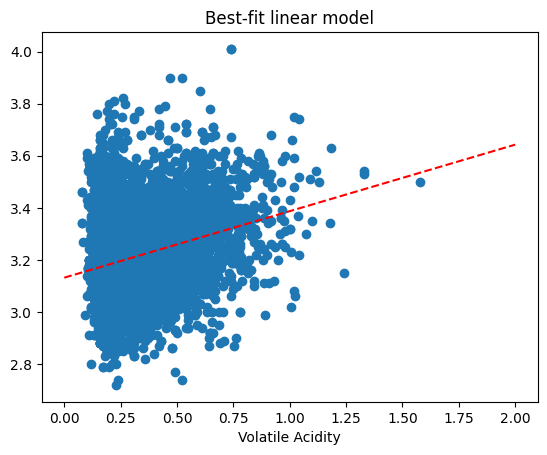

In [6]:
from numpy import linspace, floor, ceil

# Two points make a line:
x_fit = linspace(floor(x.min()), ceil(x.max()), 2)
y_fit = alpha*x_fit + beta

scatter(x, y, marker='o')
plot(x_fit, y_fit, 'r--')
xlabel('Volatile Acidity')
title('Best-fit linear model');

**Congrats!** It appears the two are related afterall.
If you've gotten this far without errors, you're ready to move to the next section.

# Part 1: Simple Regression Application and Diagnostics (Wine)
Now that we know about the background, let's try it using our [SciKit](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) methodologies and see where they get us.

In [7]:
# Run this cell #
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

## Fitting a model

**Exercise 1** (20 points). We know that for application purposes, there is a specific configuration array for implementing Linear Regression with SciKit. As such, use the .reshape (-1, 1) method on our 2 columns (in the form of numpy arrays), assigning X to the independent variable (volatile acidity) and y to the dependent (pH).


In [8]:
## YOUR ANSWER HERE
#BEGIN SOLUTION
X = np.asarray(x)
X = X.reshape(-1,1)
y = np.asarray(y)
y = y.reshape(-1,1)
#END SOLUTION

In [9]:
# Test cell: `linreg_fit_test`

assert X.shape == (6497,1), "Shape of Volatile Acidity array is not correct for linear regression"
assert y.shape == (6497,1), "Shape of Volatile Acidity array is not correct for linear regression"

print("\n(Passed! You got 20 points!)")


(Passed! You got 20 points!)


**Exercise 2** (40 points). Based on our X and y arrays, we should be able to fit a model. Do so using the LinearRegression().fit method. Set alpha (float) equal to your linear regression .coef_ and beta equal to your model . intercept_ per our formula: $y \sim \alpha \cdot x + \beta$.



Normally here we would also assign a train and test split, for now we'll ignore that to ensure that we all end up with the same answers.

In [10]:
def simp_reg (X, y):
    ## YOUR ANSWER HERE
    #BEGIN SOLUTION
    model = LinearRegression().fit(X,y)
    alpha = model.coef_
    beta = model.intercept_
    #END SOLUTION
    return (alpha, beta)
simp_reg(X,y)

(array([[0.25534149]]), array([3.13177003]))

In [11]:
# Test cell: `simp_reg_test`

x, y = X, y
alpha, beta = simp_reg(x, y)
model = LinearRegression().fit(X, y)
a1 = 0.2553414857091353
b1 = 3.1317700255382817

from numpy import isclose
assert isclose(alpha, a1, rtol=.01), "Alpha is {} instead of {}.".format(alpha, a1)
assert isclose(beta, b1, rtol=.01), "Alpha is {} instead of {}.".format(beta, b1)

print("\n(Passed! You got 40 points!)")


(Passed! You got 40 points!)


We should now be able to check our work from before and see how close the two look to one another!

alpha: [[0.25534149]]
beta: [3.13177003]


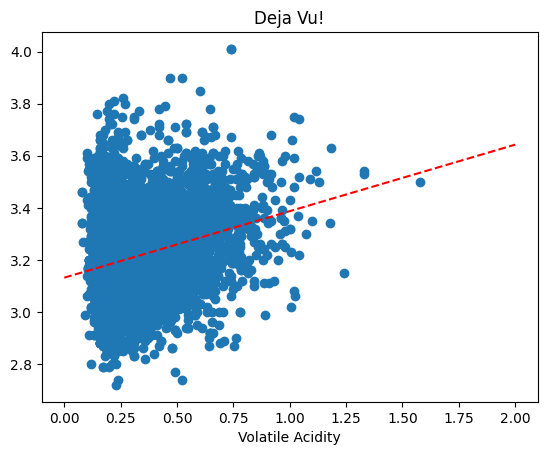

In [12]:
print("alpha:", alpha)
print("beta:", beta)
y_pred = model.predict(X)
scatter(X, y, marker='o')
plot(x_fit, y_fit, 'r--')
xlabel('Volatile Acidity')
title('Deja Vu!');

I wonder if this model meets our assumptions about linear regression. Let's check out the diagnostics of the model to see how things are shaped up.

**Exercise 3** (40 points). Import metrics from [Sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and generate the following metrics with the variable names in parentheses:

* Mean Absolute Error (`mae`)
* Mean Squared Error (`mse`)
* Root Mean Squared Error (`rmse`)
* $r^{2}$ (`r2`)



Normally here we would also assign a train and test split, for now we'll ignore that to ensure that we all end up with the same answers.

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##YOUR ANSWER HERE
#BEGIN SOLUTION
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
#END SOLUTION

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("r2:", r2)

MAE: 0.12244163071610412
MSE: 0.024081579897575138
RMSE: 0.1551824084668592
r2: 0.06835840471330967


In [17]:
#Test cell: `simp_reg_metrics`
url = 'https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/1_2_3_sol.txt'
sol = pd.read_csv(url, sep=":", header=None)
sol = sol.transpose()
headers = sol.iloc[0].values
sol.columns = headers
sol.drop(index=0, axis=0, inplace=True)
maesol = sol['MAE'].sum()
msesol = sol['MSE'].sum()
rmsesol = sol['RMSE'].sum()
r2sol = sol['r2'].sum()
assert isclose(mae, maesol, rtol=.01), "Alpha is {} instead of {}.".format(mae, maesol)
assert isclose(mse, msesol, rtol=.01), "Alpha is {} instead of {}.".format(mse, msesol)
assert isclose(rmse, rmsesol, rtol=.01), "Alpha is {} instead of {}.".format(rmse, rmsesol)
assert isclose(r2, r2sol, rtol=.01), "Alpha is {} instead of {}.".format(r2, r2sol)
print("\n(Passed! You got 40 points!)")


(Passed! You got 40 points!)


While these numbers do not mean much on our own, they can help us put things into context. Had they been multiple whole numbers, compared to the pH scale (which only goes to 14) that would tell us something quite different.

![image.png](attachment:ddb31bcd-ed95-454f-be72-5b5225a2fe4a.png)

The one that does give us pretty good insight into the value of the model is the $r^{2}$. This seems to indicated that only 6.8% of the randomness within the data is explained by the model's pattern recognition, indicating that overall it is not a great model.

## Checking for assumptions
Let's see if our data violates any of the assumptions of linear regression. Namely, we'll be looking to check for:
* Presumed Linear Relationships
* [Heteroscedasticity vs Homoscedasticity](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/homoscedasticity/)
* [Multivariate Residual Normality](https://www.geeksforgeeks.org/quantile-quantile-plots/)
* Lack of Multicollinearity

As we are performing simple linear regression presently, we can presume first that there is some inclination of a presumed linear relationship. Especially believing that the two acidity measures are related seems reasonable. There may be some other (non-linear) relationship, but for now we can brush past that one.

Lack of multicollinearity, at this stage of our flow is also guaranteed to be true. The reasoning for that is: you can't have related variables when you are only testing against one! It is possible for the target variable and the independent variables to have a relationship with one anbother that would violate this assumption, but for now you'll just have to take my word for it. As such let's test for the two remaining assumptions.

<ipython-input-18-fa5a463414e9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"predictions"] = y_pred


,volatile acidity,pH,predictions
0,0.70,3.51,3.310509
1,0.88,3.20,3.356471
2,0.76,3.26,3.325830
3,0.28,3.16,3.203266
4,0.70,3.51,3.310509


Text(0.5, 0, 'Fitted value')

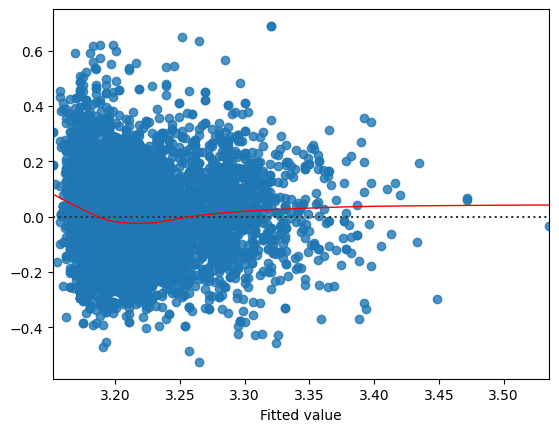

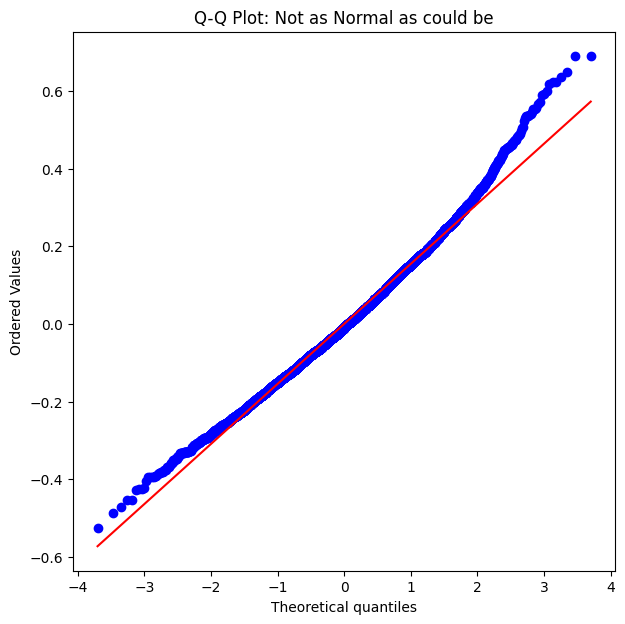

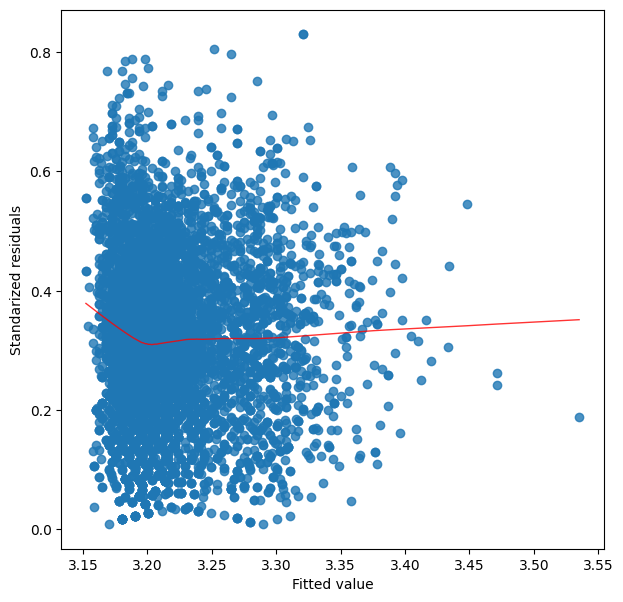

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

#Start by making combined dataframe of X and y
data = df[["volatile acidity","pH"]]
data.loc[:,"predictions"] = y_pred
display(data.head(5))

# Plot residuals
sns.residplot(x=data["predictions"], y=data["pH"], data=data,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.ylabel("")
plt.xlabel("Fitted value")

# Q-Q Plot
residuals = data["pH"] - y_pred.reshape(-1)
residuals
plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot: Not as Normal as could be")

# Standardized Residuals
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))
plt.figure(figsize=(7,7))
sns.regplot(x=data["predictions"], y=model_norm_residuals_abs_sqrt, scatter=True, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")

**Congrats!** We've now mastered simple regression by hand and using SciKit.
If you've gotten this far without errors, you're ready to move to the next section.

# Part 2: Multiple Regression Application and Diagnostics (Wine)
We can switch gears a little here. We'll still use the same dataset for multiple regression, but let's review a little theory before putting it into practice.

## Notation and review

Here is a quick summary of how we can formulate and approach the linear regression problem. For a more detailed derivation, see these [accompanying notes](./notes-linreg.ipynb).

Your data consists of $m$ observations and $n+1$ variables. One of these variables is the _response_ variable, $y$, which you want to predict from the other $n$ variables, $\{x_0, \ldots, x_{n-1}\}$. You wish to fit a _linear model_ of the following form to these data,

$$y_i \approx x_{i,0} \theta_0 + x_{i,1} \theta_1 + \cdots + x_{i,n-1} \theta_{n-1} + \theta_n,$$

where $\{\theta_j | 0 \leq j \leq n\}$ is the set of unknown coefficients. Your modeling task is to choose values for these coefficients that "best fit" the data.

If we further define a set of dummy variables, $x_{i, n} \equiv 1.0$, associated with the $\theta_n$ parameter, then the model can be written more compactly in matrix notation as

$$
  y \approx X \theta,
$$

where we will refer to $X$ as the (input) data matrix.

Visually, you can also arrange the observations into a tibble like this one:

|     y      | x<sub>0</sub> | x<sub>1</sub> | $\cdots$ | x<sub>n-1</sub> | x<sub>n</sub> |
|:----------:|:-------------:|:-------------:|:--------:|:---------------:|:-------------:|
|   $y_0$    |   $x_{0,1}$   |   $x_{0,2}$   | $\cdots$ |   $x_{0,n-1}$   |      1.0      |
|   $y_1$    |   $x_{1,1}$   |   $x_{1,2}$   | $\cdots$ |   $x_{1,n-1}$   |      1.0      |
|   $y_2$    |   $x_{2,1}$   |   $x_{2,2}$   | $\cdots$ |   $x_{2,n-1}$   |      1.0      |
|  $\vdots$  |   $\vdots$    |   $\vdots$    | $\vdots$ |    $\vdots$     |      1.0      |
|  $y_{m-1}$ |  $x_{m-1,1}$  |  $x_{m-1,2}$  | $\cdots$ |  $x_{m-1,n-1}$  |      1.0      |

This tibble includes an extra column (variable), $x_n$, whose entries are all equal to 1.0.

**Disclaimer** For the exercises in this part of the notebook, we will start over with the Wine Quality dataset, focusing on `quality` as the main target `y`. The other variables will represent `x` variables. We will go through a few different ways in which to perform the regression. The next cell should display that again. This time, as we are getting more advanced, let's go ahead and create a train and test split.

In [19]:
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7,White


**Exercise 4** (20 points). Import metrics from [Sklearn.model_selection](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Create dataframe `X`, having dropped the `quality` and `color` variables. Create dataframe `y` with just the `quality` column. Split the data into a train and test sets, with an 70% and 30% split.  Please also set the `random_state` part of the function to 42 for reproducability and testing.

In [20]:
from sklearn.model_selection import train_test_split

##YOUR ANSWER HERE
#BEGIN SOLUTION
X = df.copy()
X.drop(columns=['quality', 'color'], axis=1, inplace=True)
y = df['quality']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#END SOLUTION

In [21]:
#Test cell: `shape_data`
assert x_train.shape == (4547, 11), "Shape of x_train is {} instead of {}.  Be sure to use random_state = 42.".format(x_train.shape, '(4547, 11)')
assert y_train.shape == (4547,), "Alpha is {} instead of {}. Be sure to use random_state = 42.".format(y_train.shape, '(4547,)')
assert x_test.shape == (1950, 11), "Alpha is {} instead of {}. Be sure to use random_state = 42.".format(x_test.shape, '(1950, 11)')
assert y_test.shape == (1950,), "Alpha is {} instead of {}.Be sure to use random_state = 42.".format(y_test.shape, '(1950,)')
print("\n(Passed! You got 20 points!)")


(Passed! You got 20 points!)


## Another Way

Now that we have our splits, let's acknowledge something. While scikit is a great tool for many different Machine Learning models, it is important not to forget about other packages, as they occasionally have better ways to perform the same same functions. Take a little time to see how [Statsmodel](https://www.datarobot.com/blog/multiple-regression-using-statsmodels/#:~:text=You%20can%20also%20use%20the%20formulaic%20interface%20of,smf%20%23%20formula%3A%20response%20~%20predictor%20%2B%20predictor) works. The main reason to use it is that the summary information from our model can be much easier to extract and interpret. Let's try it out using what we know.

**Exercise 5** (50 points). Create a function that will train an OLS model using statsmodel functions and the training sets so we can better see the summary and coefficients of each variable. Be sure to [add a constant](https://www.statsmodels.org/stable/generated/statsmodels.tools.tools.add_constant.html) to our X matrix as shown above in the "Notation and Review" section.

In [22]:
def mlr(X, y):
    import statsmodels.api as sm
    ##YOUR CODE HERE##
    #BEGIN SOLUTION#
    X = sm.add_constant(X)
    est = sm.OLS(y, X).fit()
    return est
    #END SOLUTION#
mlin_reg = mlr(x_train, y_train)
mlin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     176.6
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        16:45:44   Log-Likelihood:                -5066.4
No. Observations:                4547   AIC:                         1.016e+04
Df Residuals:                    4535   BIC:                         1.023e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   61.9643     14.089      4.398      0.000      34.343      89.585
fixed acidity            0.0801      0.019      4.327      0.000       0.044       0.116
volatile acidity        -1.3849      0.094    -14.717      0.000      -1.569      -1.200
citric acid             -0.1516      0.096     -1.579      0.114      -0.340       0.037
residual sugar           0.0488      0.006      7.930      0.000       0.037       0.061
chlorides               -0.0572      0.418     -0.137      0.891      -0.876       0.762
free sulfur dioxide      0.0070      0.001      7.506      0.000       0.005       0.009
total sulfur dioxide    -0.0027      0.000     -7.887      0.000      -0.003      -0.002
density                -61.4554     14.380     -4.274      0.000     -89.647     -33.264
pH                       0.4584      0.108      4.245      0.000       0.247       0.670
sulphates                0.8071      0.092      8.769      0.000       0.627       0.988
alcohol                  0.2720      0.020     13.801      0.000       0.233       0.311
==============================================================================
Omnibus:                       98.219   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.091
Skew:                           0.081   Prob(JB):                     1.77e-45
Kurtosis:                       4.030   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
## Test cell: `statsmodels`
assert str(type(mlin_reg)) == "<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>", "Not a regression model"
test = (mlin_reg.summary().tables[1])
test = pd.DataFrame(test)
ts1 = pd.Series(test.iloc[:,1].values, index=test.iloc[:,0])
ts1 = ts1.astype(np.float16, errors='ignore')


url = 'https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/1_2_5_sol.txt'
sol = pd.read_fwf(url, header= None)
sol = sol.set_index(sol.columns[0], inplace=False)
sol = sol.rename_axis(index=None, columns=['Index'])
columns = ['coef']
sol.columns= columns
ts2 = pd.Series(sol.iloc[:,0].values, index=sol.index)

try:
    ts1.equals(ts2) #, check_exact=False, atol=0.001
    print("\n(Passed! You got 50 points!)")
except AssertionError as e:
    print("Models are not equal:", e)


(Passed! You got 50 points!)


# Readjust Model
**Exercise 6** (60 points) It seems from the above example that there are a few variables that have no statistical significance being in the model. As such let's take out `chlorides` and `citric acid` to ensure that we are keeping everything statistically significant. Then we'll re-run everything and check the summary output again.

Checklist:
* Create `X_adj` from the original df, dropping `quality`, `color`, `chlorides`, and `citric acid`
* Create `x_train_adj`, `x_test_adj`, `y_train_adj`, `y_test_adj` using a 70/30 split and random state 42
* Create `mlin_reg_adj` by running our mlr function on your adjusted training sets
* Show a summary

In [27]:
##YOUR CODE HERE##
#BEGIN SOLUTION#
X_adj = df.copy()
X_adj.drop(columns=['quality', 'color', 'chlorides', 'citric acid'], axis=1, inplace=True)
x_train_adj, x_test_adj, y_train_adj, y_test_adj = train_test_split(X, y, test_size=0.3, random_state=42)
mlin_reg_adj = mlr(x_train_adj, y_train_adj)
mlin_reg_adj.summary()
#END SOLUTION#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     176.6
Date:                Thu, 30 May 2024   Prob (F-statistic):               0.00
Time:                        16:45:44   Log-Likelihood:                -5066.4
No. Observations:                4547   AIC:                         1.016e+04
Df Residuals:                    4535   BIC:                         1.023e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   61.9643     14.089      4.398      0.000      34.343      89.585
fixed acidity            0.0801      0.019      4.327      0.000       0.044       0.116
volatile acidity        -1.3849      0.094    -14.717      0.000      -1.569      -1.200
citric acid             -0.1516      0.096     -1.579      0.114      -0.340       0.037
residual sugar           0.0488      0.006      7.930      0.000       0.037       0.061
chlorides               -0.0572      0.418     -0.137      0.891      -0.876       0.762
free sulfur dioxide      0.0070      0.001      7.506      0.000       0.005       0.009
total sulfur dioxide    -0.0027      0.000     -7.887      0.000      -0.003      -0.002
density                -61.4554     14.380     -4.274      0.000     -89.647     -33.264
pH                       0.4584      0.108      4.245      0.000       0.247       0.670
sulphates                0.8071      0.092      8.769      0.000       0.627       0.988
alcohol                  0.2720      0.020     13.801      0.000       0.233       0.311
==============================================================================
Omnibus:                       98.219   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.091
Skew:                           0.081   Prob(JB):                     1.77e-45
Kurtosis:                       4.030   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
## Test cell: `statsmodels adj`
assert str(type(mlin_reg_adj)) == "<class 'statsmodels.regression.linear_model.RegressionResultsWrapper'>", "Not a regression model"
test = (mlin_reg_adj.summary().tables[1])
test = pd.DataFrame(test)
ts1 = pd.Series(test.iloc[:,1].values, index=test.iloc[:,0])
ts1 = ts1.astype(np.float16, errors='ignore')

url = 'https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/1_2_5_sol.txt'
sol = pd.read_fwf(url, header= None)
sol = sol.set_index(sol.columns[0], inplace=False)
sol = sol.rename_axis(index=None, columns=['Index'])
columns = ['coef']
sol.columns= columns
ts2 = pd.Series(sol.iloc[:,0].values, index=sol.index)

try:
    ts1.equals(ts2) #, check_exact=False, atol=0.001
    print("\n(Passed! You got 60 points!)")
except AssertionError as e:
    print("Models are not equal:", e)


(Passed! You got 60 points!)


**Exercise 7** (10 points) Now let's see what it looks like to run a stepwise regression. The underlying goal of stepwise regression is, through a series of tests (e.g. F-tests, t-tests) to find a set of independent variables that significantly influence the dependent variable. This is done through iteration. Stepwise regression can be achieved either by trying out one independent variable at a time and including it in the regression model if it is statistically significant or by including all potential independent variables in the model and eliminating those that are not statistically significant.

* **Forward selection** begins with no variables in the model, tests each variable as it is added to the model, then keeps those that are deemed most statistically significant—repeating the process until the results are optimal.
* **Backward elimination** starts with a set of independent variables, deleting one at a time, then testing to see if the removed variable is statistically significant.
* **Bidirectional elimination** is a combination of the first two methods that test which variables should be included or excluded.

The below runs a stepwise using the [Sequential Feature Selector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) as a part of Scikit, which can come in handy for this kind of analysis. Let's see how a forward selection compares to the models we've already created.

In [29]:
from sklearn.feature_selection import SequentialFeatureSelector

# Perform stepwise regression
sfs = SequentialFeatureSelector(LinearRegression(),
								n_features_to_select=8,
								direction='forward',
                                scoring='r2',
								cv=None)
selected_features = sfs.fit(X, y)

df_selected = df[selected_features.get_feature_names_out()]
display(df_selected)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
        df_selected, y,
        test_size=0.3,
        random_state=42)

# Fit a linear regression model using the selected features
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions using the test set
y_pred_step = reg.predict(x_test)

# Evaluate the model performance
meanAbErr = mean_absolute_error(y_test, y_pred_step)
meanSqErr = mean_squared_error(y_test, y_pred_step)
rootMeanSqErr = mean_squared_error(y_test, y_pred_step, squared = False)
rsquared = r2_score(y_test, y_pred_step)
print('R squared:', rsquared)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('(Passed! You got 10 points!)')

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.70,0.00,0.076,34,0.99780,3.51,0.56,9.4
1,0.88,0.00,0.098,67,0.99680,3.20,0.68,9.8
2,0.76,0.04,0.092,54,0.99700,3.26,0.65,9.8
3,0.28,0.56,0.075,60,0.99800,3.16,0.58,9.8
4,0.70,0.00,0.076,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...
6492,0.21,0.29,0.039,92,0.99114,3.27,0.50,11.2
6493,0.32,0.36,0.047,168,0.99490,3.15,0.46,9.6
6494,0.24,0.19,0.041,111,0.99254,2.99,0.46,9.4
6495,0.29,0.30,0.022,110,0.98869,3.34,0.38,12.8


R squared: 0.26415514729264944
Mean Absolute Error: 0.570197309173234
Mean Square Error: 0.5369018189777843
Root Mean Square Error: 0.7327358452933666
(Passed! You got 10 points!)


Not much better... I wonder if there is something we already know from Applied ML1 that we can use...

# Power Boost
**Exercise 7** (70 points) In ML1 we learned about boosted models, and specifically XGBoost. Interestingly enough, this kind of model can also be used in a regression problem. Here we will attempt to do so in a similar way as we did in previous problems.

Checklist:
* Import our GradientBoostingRegressor from sklearn.ensemble, cross_val_score from sklearn.model_selection, and RepeatedKFold from sklearn.model_selection
* Create `xg` by using the imported GradientBoostedRegressor
* Fit model `xg` with `x_train_adj` and `y_train_adj` that we made earlier
* Create `y_pred_xg` by predicting on `x_test_adj`
* Create `meanAbErr_xg` using mean_absolute_error function (Refer to Exercise 3, can copy/paste then change to refer to `y_test_adj` and `y_pred_xg`)
* Create `meanSqErr_xg` using mean_squared_error function (Refer to Exercise 3, can copy/paste then change to refer to `y_test_adj` and `y_pred_xg`)
* Create `r2_xg` using mean_squared_error function (Refer to Exercise 3, can copy/paste then change to refer to `y_test_adj` and `y_pred_xg`)
* Create `meanSqErr_xg` using r2_score function (Refer to Exercise 3, can copy/paste then change to refer to `y_test_adj` and `y_pred_xg`)

* Print `r2_xg`, `meanAbErr_xg`, `meanSqErr_xg`, `rootMeanSqErr_xg` with labels

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
##YOUR ANSWER HERE
#BEGIN SOLUTION
##Fit Regression Model
xg = GradientBoostingRegressor().fit(x_train_adj, y_train_adj)

# Predict
y_pred_xg = xg.predict(x_test_adj)

# Evaluate the model performance
meanAbErr_xg = mean_absolute_error(y_test_adj, y_pred_xg)
meanSqErr_xg = mean_squared_error(y_test_adj, y_pred_xg)
rootMeanSqErr_xg = mean_squared_error(y_test_adj, y_pred_xg, squared = False)
r2_xg = r2_score(y_test_adj, y_pred_xg)
print('R squared:', r2_xg)
print('Mean Absolute Error:', meanAbErr_xg)
print('Mean Square Error:', meanSqErr_xg)
print('Root Mean Square Error:', rootMeanSqErr_xg)
print('(Passed! You got 10 points!)')
#END SOLUTION

R squared: 0.38419318266136326
Mean Absolute Error: 0.5276273885835053
Mean Square Error: 0.44931727000817484
Root Mean Square Error: 0.670311323198538
(Passed! You got 10 points!)


In [35]:
## Test cell: `xgboost`
url = 'https://raw.githubusercontent.com/boyerr111/newmanu_AML2/master/datasets/1_2_7_sol.txt'
sol = pd.read_csv(url, sep=":", header=None)
sol = sol.transpose()
headers = sol.iloc[0].values
sol.columns = headers
sol.drop(index=0, axis=0, inplace=True)
maesol = sol['Mean Absolute Error'].sum()
msesol = sol['Mean Square Error'].sum()
rmsesol = sol['Root Mean Square Error'].sum()
r2sol = sol['R squared'].sum()
# assert isclose(meanAbErr_xg, maesol, rtol=.01), "Alpha is {} instead of {}.".format(meanAbErr_xg, maesol)
# assert isclose(meanSqErr_xg, msesol, rtol=.01), "Alpha is {} instead of {}.".format(meanSqErr_xg, msesol)
# assert isclose(rootMeanSqErr_xg, rmsesol, rtol=.01), "Alpha is {} instead of {}.".format(rootMeanSqErr_xg, rmsesol)
# assert isclose(r2_xg, r2sol, rtol=.01), "Alpha is {} instead of {}.".format(r2_xg, r2sol)
np.testing.assert_almost_equal(meanAbErr_xg, maesol, decimal=2, err_msg="Alpha is {} instead of {}.".format(meanAbErr_xg, maesol), verbose=True)
np.testing.assert_almost_equal(meanSqErr_xg, msesol, decimal=2, err_msg="Alpha is {} instead of {}.".format(meanSqErr_xg, msesol), verbose=True)
np.testing.assert_almost_equal(rootMeanSqErr_xg, rmsesol, decimal=2, err_msg="Alpha is {} instead of {}.".format(rootMeanSqErr_xg, rmsesol), verbose=True)
np.testing.assert_almost_equal(r2_xg, r2sol, decimal=2, err_msg="Alpha is {} instead of {}.".format(r2_xg, r2sol), verbose=True)
print("\n(Passed! You got 70 points!)")


(Passed! You got 70 points!)


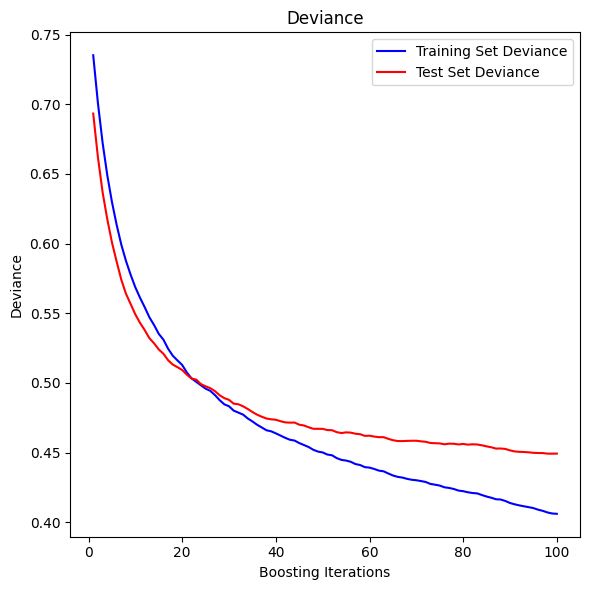

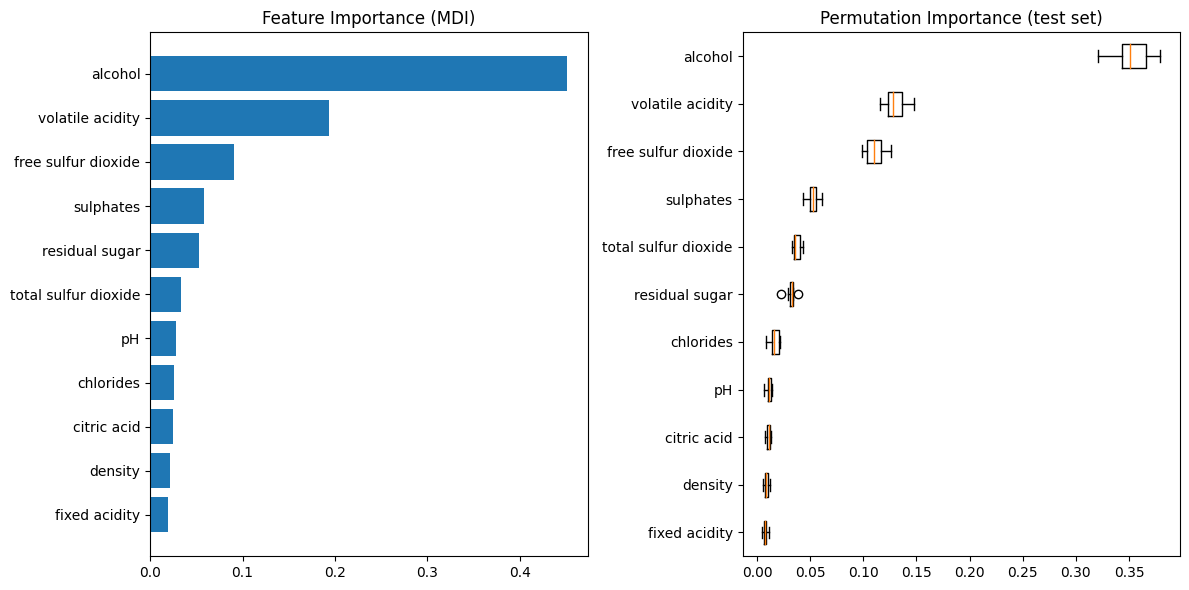

In [34]:
from sklearn.inspection import permutation_importance
params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
feature_importance = xg.feature_importances_
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred_xg in enumerate(xg.staged_predict(x_test_adj)):
    test_score[i] = mean_squared_error(y_test_adj, y_pred_xg)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    xg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

feature_importance = xg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(x_test_adj.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(xg, x_test_adj, y_test_adj, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(x_test_adj.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

While this does not seem like a tremendously good model, having only a modest R Squared of 35%, what is important to realize is that some real world problems do not always have wildly impressive stats to go with them. That does not mean that they are not valuable and that information cannot be gleaned from them.

**Congrats!** If you've gotten this far without errors, you're ready to submit your notebook! Be sure to Restart the Kernel and Run All Cells from the beginning.